# Development of the elements of the credit policy of the small bank with bootstrapping

Cyrill A. Murashev, 2023-02-19

## Abstract

This material is a continuation of a cycle of work on the topic of resampling methods. We discussed the jackknife method in the previous article. Today we will look at the more popular and universal method of bootstrapping. It would not be an exaggeration to say that bootstrapping is one of the cornerstones of modern data science, along with, for example, linear regression or ROC analysis. This material was developed specifically for appraisers, so we will look at the topic from the point of view of its practical usability in the practice of collateral lending.

Let's imagine a small bank operating in Eastern Europe. Its management has set a goal to develop a system of rules for the bank's credit policy. One of them should solve the task of determining the maximum price of the mortgaged property, which is safe for the financial stability of the bank. It was decided to take into account the modern reality, especially the latest achievements in the world of artificial intelligence, as well as the requirements of [IFRS 13 "Fair Value Measurement"](https://www.ifrs.org/issued-standards/list-of-standards/ifrs-13-fair-value-measurement/). Thus, it was decided to minimize the influence of subjective factors and maximize the influence of scientific methods. Since the capabilities of the small financial institution are rather limited, there is no opportunity to implement the full-scale AI methods based on a real big data. Instead, it is reasonable to implement some local solutions based on machine learning and apply them to the medium-sized sample.

It is very important to understand the following:
1. we are dealing with a sample data, not with the whole market data;
1. our goal is to estimate some parameters of the market, not only for the sample.
In this context, we should apply some special methods that can help us to bring the estimates of parameters made for the sample closer to the true values that exist on the market under consideration.

Today we will explore the method of bootstrapping in its basic implementation. It allows us to improve almost any estimate made for the sample and reduce its bias relative to the true value that exists in the market.





## Task statement and key inputs

As mentioned above, our training task is to develop some aspects of a bank's credit policy. Imagine a local market for real estate. The bank often makes loans secured by this property. In this case, one of the tasks is to set limits for the maximum possible loan amount, as well as the maximum safe value of the collateral. Both of these conditions are conditioned by the need to limit potential losses. And the second is also conditioned by the low liquidity of atypical objects, including those whose absolute or unit price is too high. In addition, insurance companies usually have their own limits, and they would not accept the risk of an excessive insurance payout, shifting it to the insured in the part of exceeding the limit. Therefore, it is reasonable to set the upper limit of the mortgaged property. In this case, the property with a value lower than the limit would be accepted as collateral for its full value. And a property with a value higher than the limit would be accepted at the limit value. This applies to both total and unit values.

In order to achieve a balance between financial security and profitability, the best choice is to determine the market values of safe limits. This task requires estimation of certain specific parameters of the whole market. Since we have only a sample, we should apply some special methods that will help us to correct the bias between sample and population estimates. Now we can create a system of rules. 
1. The upper limit of the total value of the property is equal to the expectation plus one standard deviation.
1. The upper limit of the unit value of the property is equal to the expectation plus two standard deviations.

The specific values of the standard deviation could be shifted in one direction or the other, depending on a bank's objectives.

Then we will estimate the values of the necessary parameters. We should estimate the true values of the four parameters: total and unit market values, as well as their standard deviations. As mentioned above, we can't get true values directly because we're working with samples. Therefore, we will use the method of bootstrapping, which allows us to reduce the bias of the sample estimates relative to the true values that exist in the population.

## The General Statements of Bootstrapping

**Bootstrapping** is a random sampling with replacement technique. It belongs to the broader class of resampling methods. This technique can be used to estimate the sampling distribution of almost any statistic.

In practice, when analyzing data, appraisers are almost always faced with the need to estimate the variance and confidence intervals of some measure. It is difficult to make useful inferences based on point estimates alone. Therefore, it is very useful to be able to estimate the confidence intervals of any indicators. Classical statistics tells us that we can, for example, estimate confidence intervals for the mean under certain assumptions. But it does not give a simple answer to the question of what to do if these assumptions are violated. Estimating confidence intervals for the median is a much more complex problem in itself. So we need a universal method that allows us to estimate almost any parameter and obtain its variance and confidence intervals regardless of any assumptions about the distribution of that parameter.

The method of bootstrapping successfully solves the problem of obtaining values of such indicators regardless of the data distribution. Moreover, it allows you to improve any sample estimates, bringing their values closer to the true values in the population.

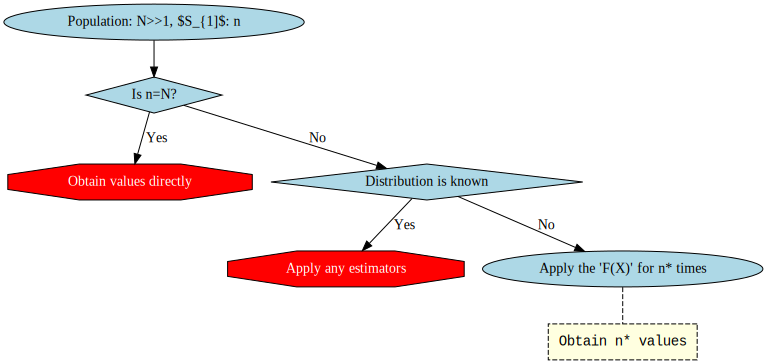

In [118]:
from flowgiston import *
Base = flowgiston_base(fillcolor='lightblue')
class Yes(Base):
    fillcolor = 'Red'
    fontcolor = 'white'
    shape = 'octagon'

class Note(Base):
    fillcolor = 'lightyellow'
    style = 'filled,dashed'
    shape = 'box'
    fontname = 'courier'

chart = FlowgistonChart(Base)

sample = chart.start("Population: N>>1, $S_{1]$: n").edge(chart.if_("Is n=N?"))
sample.yes(chart.Yes.node("Obtain values directly"))
distribution = sample.no(chart.if_("Distribution is known"))
distribution.yes(chart.Yes.node("Apply any estimators"))
end = distribution.no(chart.end("Apply the 'F(X)' for n* times")).edge(chart.Note.node("Obtain n* values"), style='dashed', dir='none')
chart